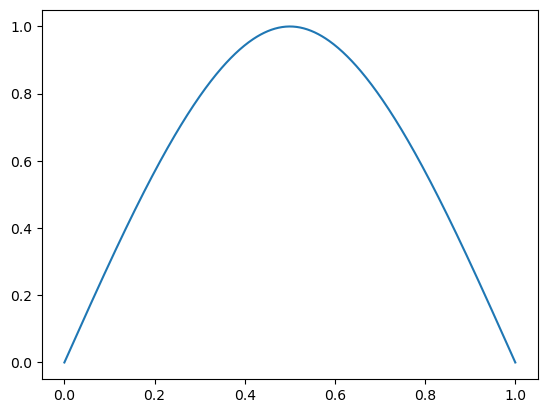

In [14]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# 定义起始位置、终止位置和时间向量
q0 = np.array([0, 0.5, 1])  # 起始位置
qf = np.array([0, 1, 0])  # 终止位置
t = np.linspace(0, 1, int(1/0.002))  # 时间向量，0到1，共500个时间点

# 定义起始速度、终止速度、起始加速度和终止加速度
dq0 = 0  # 起始速度
dqf = 0  # 终止速度
ddq0 = 0  # 起始加速度
ddqf = 0  # 终止加速度

# 使用interp1d函数进行插值
interp_func = CubicSpline(q0, qf, bc_type='natural')

# 在指定的时间点上计算轨迹
q = interp_func(t)

# 打印结果
plt.plot(t, q, '-')

In [15]:
def myChaBu(q0, q1, qd0=0, qd1=0, qdd0=0, qdd1=0, tv=np.arange(0, 1, 0.002)):
    T = max(tv)
    t = np.array(tv)

    F = q0
    E = qd0
    D = qdd0 / 2

    MAT_A = np.array([[T ** 3, T ** 4, T ** 5],
                      [3 * T ** 2, 4 * T ** 3, 5 * T ** 4],
                      [6 * T, 12 * T ** 2, 20 * T ** 3]])
    MAT_b = np.array([q1 - F - E * T - D * T ** 2,
                      qd1 - E - 2 * D * T,
                      qdd1 - 2 * D])
    x = np.linalg.solve(MAT_A, MAT_b)
    C, B, A = x

    tt = np.column_stack((t ** 5, t ** 4, t ** 3, t ** 2, t, np.ones_like(t)))
    c = np.array([A, B, C, D, E, F])

    qt = np.dot(tt, c)

    if hasattr(q0, '__len__'):
        c = np.array([np.zeros_like(A), 5 * A, 4 * B, 3 * C, 2 * D, E])
        qdt = np.dot(tt, c.T)
    else:
        qdt = None

    if hasattr(q0, '__len__') and hasattr(q1, '__len__'):
        c = np.array([np.zeros_like(A), np.zeros_like(B), 20 * A, 12 * B, 6 * C, 2 * D])
        qddt = np.dot(tt, c.T)
    else:
        qddt = None

    return qt, qdt, qddt

ValueError: x, y, and format string must not be None

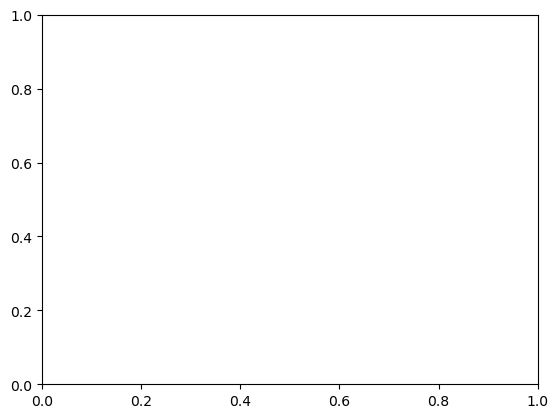

In [24]:
import matplotlib.pyplot as plt

t = np.arange(0,1,0.002)
a,b,_ = myChaBu(0,1,0,0,0,0,t)

b

plt.plot(t,b)
plt.show()

In [30]:
aa = np.arange(0,1,0.2)
aa

array([0. , 0.2, 0.4, 0.6, 0.8])

In [40]:
aa = np.random.rand(5,3)

In [41]:
aa[:2, 0]

array([0.86496418, 0.08438439])

In [45]:
aa[2:5-1, 0]

array([0.09592308, 0.3006307 ])

In [46]:
aa[5-1:, 0]

array([0.24192873])

In [48]:
bb = np.arange(1,10)
bb

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
def myChaBu(q0, q1, qd0=0, qd1=0, qdd0=0, qdd1=0, tv=np.arange(0, 1, 0.002)):
    T = max(tv)
    t = np.array(tv)

    F = q0
    E = qd0
    D = qdd0 / 2

    MAT_A = np.array([[T ** 3, T ** 4, T ** 5],
                      [3 * T ** 2, 4 * T ** 3, 5 * T ** 4],
                      [6 * T, 12 * T ** 2, 20 * T ** 3]])
    MAT_b = np.array([q1 - F - E * T - D * T ** 2,
                      qd1 - E - 2 * D * T,
                      qdd1 - 2 * D])
    x = np.linalg.solve(MAT_A, MAT_b)
    C, B, A = x

    tt = np.column_stack((t ** 5, t ** 4, t ** 3, t ** 2, t, np.ones_like(t)))
    c = np.array([A, B, C, D, E, F])

    qt = np.dot(tt, c)

    c = np.array([np.zeros_like(A), 5 * A, 4 * B, 3 * C, 2 * D, E])
    qdt = np.dot(tt, c.T)


    c = np.array([np.zeros_like(A), np.zeros_like(B), 20 * A, 12 * B, 6 * C, 2 * D])
    qddt = np.dot(tt, c.T)

    return qt, qdt, qddt

C:\Users\Ma\AppData\Local\Temp\ipykernel_22028\1193427965.py:10: RuntimeWarning: overflow encountered in long_scalars
  [3 * T ** 2, 4 * T ** 3, 5 * T ** 4],
C:\Users\Ma\AppData\Local\Temp\ipykernel_22028\1193427965.py:11: RuntimeWarning: overflow encountered in long_scalars
  [6 * T, 12 * T ** 2, 20 * T ** 3]])


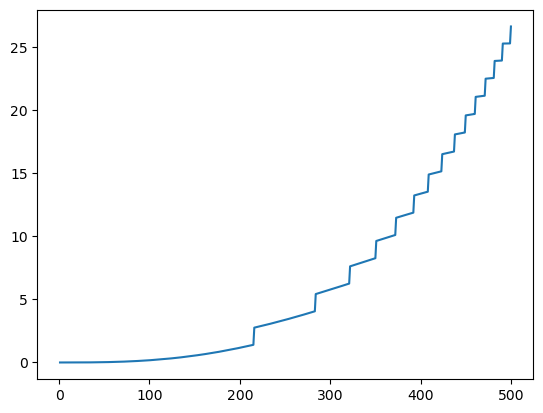

In [51]:
t = np.arange(1, 500 + 1)
[aa, bb, _] = myChaBu(0, 0.1 * 8 / 15 * 500,tv=t)
plt.plot(t,aa)
plt.show()

In [57]:
aa = 400 ** 4
aa

25600000000

In [60]:
import numpy as np
from LIPM.LIPM_3D import LIPM3D


def myChaBu(q0, q1, qd0=0, qd1=0, qdd0=0, qdd1=0, tv=np.arange(0, 1, 0.002)):
    T = max(tv)
    t = np.array(tv)

    # Calculate coefficients
    F = q0
    E = qd0
    D = qdd0 / 2

    MAT_A = np.array([[T ** 3, T ** 4, T ** 5],
                      [3 * T ** 2, 4 * T ** 3, 5 * T ** 4],
                      [6 * T, 12 * T ** 2, 20 * T ** 3]])
    MAT_b = np.array([q1 - F - E * T - D * T ** 2,
                      qd1 - E - 2 * D * T,
                      qdd1 - 2 * D])
    x = np.linalg.solve(MAT_A, MAT_b)
    C, B, A = x

    tt = np.column_stack((t ** 5, t ** 4, t ** 3, t ** 2, t, np.ones_like(t)))
    c = np.array([A, B, C, D, E, F])

    # Calculate position
    qt = np.dot(tt, c)

    # Calculate velocity
    c = np.array([np.zeros_like(A), 5 * A, 4 * B, 3 * C, 2 * D, E])
    qdt = np.dot(tt, c.T)

    # Calculate acceleration
    c = np.array([np.zeros_like(A), np.zeros_like(B), 20 * A, 12 * B, 6 * C, 2 * D])
    qddt = np.dot(tt, c.T)

    return qt, qdt, qddt


# Initialize LIPM model
delta_t = 0.002
LIPM_model = LIPM3D(dt=delta_t, T_sup=0.8, T_dbl=0.2)

# Initialize foot positions and COM positions
COM_pos_x, COM_pos_y, COM_pos_vx, COM_pos_vy, COM_pos_ax, COM_pos_ay = [], [], [], [], [], []
left_foot_pos_x, left_foot_pos_y, left_foot_pos_z = [], [], []
right_foot_pos_x, right_foot_pos_y, right_foot_pos_z = [], [], []

COM_pos_z_0 = 1.0
COM_pos_0 = [0, 0.1327, COM_pos_z_0 - 0.227]  # Initial COM position
COM_v0 = [-0.723, 0.001]  # Initial COM velocity
left_foot_pos = [-0.2275, 0.1327, 0]  # Initial left foot position
right_foot_pos = [0.2275, 0.1327, 0]  # Initial right foot position

total_time = 6
swing_data_len = int(LIPM_model.T_sup / delta_t)
double_foot_len = int(LIPM_model.T_dbl / delta_t)

# Main loop
for i in range(int(total_time / delta_t)):
    LIPM_model.step()

    # Record data
    COM_pos_x.append(LIPM_model.x_t + left_foot_pos[0])
    COM_pos_y.append(LIPM_model.y_t + left_foot_pos[1])
    COM_pos_vx.append(LIPM_model.vx_t)
    COM_pos_vy.append(LIPM_model.vy_t)
    COM_pos_ax.append(LIPM_model.x_t / LIPM_model.T_c ** 2)
    COM_pos_ay.append(LIPM_model.y_t / LIPM_model.T_c ** 2)
    left_foot_pos_x.append(LIPM_model.left_foot_pos[0])
    left_foot_pos_y.append(LIPM_model.left_foot_pos[1])
    left_foot_pos_z.append(LIPM_model.left_foot_pos[2])
    right_foot_pos_x.append(LIPM_model.right_foot_pos[0])
    right_foot_pos_y.append(LIPM_model.right_foot_pos[1])
    right_foot_pos_z.append(LIPM_model.right_foot_pos[2])

# Smooth foot positions
data_len = len(left_foot_pos_x)

for i in range(1, data_len - double_foot_len // 2):
    if i > 1 and (i - 1) % swing_data_len == swing_data_len - double_foot_len // 2:
        COM_smooth_x, _, _ = myChaBu(
            COM_pos_x[i], COM_pos_x[i + double_foot_len - 1],
            COM_pos_vx[i], COM_pos_vx[i + double_foot_len - 1],
            COM_pos_ax[i], COM_pos_ax[i + double_foot_len - 1],
            np.arange(0, delta_t * double_foot_len, delta_t)
        )

        COM_pos_x[i:i + double_foot_len] = COM_smooth_x

        COM_smooth_y, _, _ = myChaBu(
            COM_pos_y[i], COM_pos_y[i + double_foot_len - 1],
            COM_pos_vy[i], COM_pos_vy[i + double_foot_len - 1],
            COM_pos_ay[i], COM_pos_ay[i + double_foot_len - 1],
            np.arange(0, delta_t * double_foot_len, delta_t)
        )

        COM_pos_y[i:i + double_foot_len] = COM_smooth_y

        i += double_foot_len // 2 - 1
        if i > data_len - double_foot_len // 2:
            break

print('---------  Program terminated')

E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\LIPM_3D.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.support_leg is 'left_leg': # then the next support leg is the right leg
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\LIPM_3D.py:98: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif self.support_leg is 'right_leg': # then the next support leg is the left leg
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\LIPM_3D.py:108: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.support_leg is 'left_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\LIPM_3D.py:111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif self.support_leg is 'right_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\LIPM_3D.py:171: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.support_leg is 'left_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\LIPM_3D.py:178: Syn

AttributeError: 'LIPM3D' object has no attribute 'T_c'

In [2]:
from LIPM import func_LIPM_3D as func

COM_pos_x, COM_pos_y, left_foot_pos_x, left_foot_pos_y, left_foot_pos_z, right_foot_pos_x, right_foot_pos_y, right_foot_pos_z = func.func(0.4, 6)

E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\func_LIPM_3D.py:71: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if LIPM_model.support_leg is 'left_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\func_LIPM_3D.py:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if LIPM_model.support_leg is 'left_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\func_LIPM_3D.py:128: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if LIPM_model.support_leg is 'left_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\func_LIPM_3D.py:141: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if LIPM_model.support_leg is 'left_leg':
E:\研一\科研项目\仿人机器人\步态规划\BipedalWalkingRobots-forMuJoCo\LIPM\func_LIPM_3D.py:151: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if LIPM_model.support_leg is 'left_leg':


ModuleNotFoundError: No module named 'LIPM_3D'